In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import os
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt

## Plot images

In [2]:
plt.rcParams["savefig.bbox"] = "tight"
# sphinx_gallery_thumbnail_number = 2


def plot(imgs, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0])
    _, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            img = F.to_pil_image(img.to("cpu"))
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    plt.tight_layout()

## Load the wlasl images

In [3]:
os.chdir('../')

In [4]:
image_path = 'data/wlasl/rawframes/test_flow/00625/'

In [80]:
image1_path = 'data/wlasl/rawframes/test_flow/00625/img_00009.jpg'
image2_path = 'data/wlasl/rawframes/test_flow/00625/img_00012.jpg'

img1 = cv2.cvtColor(cv2.imread(image1_path), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(image2_path), cv2.COLOR_BGR2RGB)

img1_batch = torch.tensor(img1).unsqueeze(dim=0).permute(0,3,1,2)
img2_batch = torch.tensor(img2).unsqueeze(dim=0).permute(0,3,1,2)

In [27]:
img1_batch.shape

torch.Size([1, 3, 256, 256])

In [63]:
from torchvision.models.optical_flow import Raft_Large_Weights

weights = Raft_Large_Weights.DEFAULT
transforms = weights.transforms()


def preprocess(img1_batch, img2_batch):
    img1_batch = F.resize(img1_batch, size=[256, 256])
    img2_batch = F.resize(img2_batch, size=[256, 256])
    return transforms(img1_batch, img2_batch)


img1_batch, img2_batch = preprocess(img1_batch, img2_batch)

print(f"shape = {img1_batch.shape}, dtype = {img1_batch.dtype}")

shape = torch.Size([1, 3, 256, 256]), dtype = torch.float32


In [64]:
from torchvision.models.optical_flow import raft_large

# If you can, run this example on a GPU, it will be a lot faster.
device = "cuda" if torch.cuda.is_available() else "cpu"

model = raft_large(weights=Raft_Large_Weights.DEFAULT, progress=False).to(device)
model = model.eval()

flow = model(img1_batch.to(device), img2_batch.to(device))[-1]

In [68]:
flow.shape

torch.Size([1, 2, 256, 256])

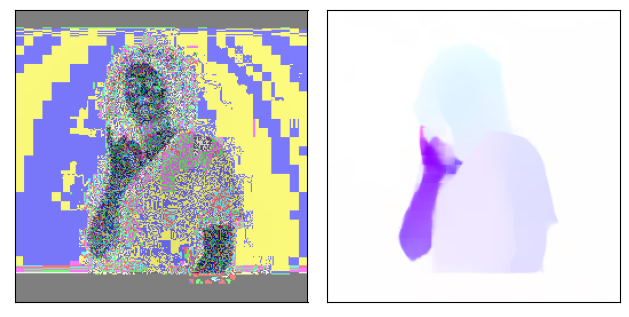

In [81]:
from torchvision.utils import flow_to_image

flow_imgs = flow_to_image(flow)

# The images have been mapped into [-1, 1] but for plotting we want them in [0, 1]
img1_batch = [(img1 + 1) / 2 for img1 in img1_batch]

grid = [[img1, flow_img] for (img1, flow_img) in zip(img1_batch, flow_imgs)]
plot(grid)

In [79]:
flow_imgs.shape

torch.Size([1, 3, 256, 256])